https://wikidocs.net/53560 참고

# 1. 단항 선형 회귀 실습
* 한 개의 입력이 들어가서 한개의 출력이 나오는 구조

* 데이터에 대한 이해(Data Definition)

* 가설(Hypothesis) 수립
  * 가설을 수립하는 방법에 대해서 알아봅니다.

* 손실 계산하기(Compute loss)
  * 학습 데이터를 이용해서 연속적으로 모델을 개선시키는데 이 때 손실(loss)를 이용합니다.

* 경사 하강법(Gradient Descent)
  * 학습을 위한 핵심 알고리즘인 경사 하강법(Gradient Descent)에 대해서 이해합니다.

In [54]:
import torch
import torch.nn as nn#딥러닝을 만들수있는 함수
import torch.optim as optim #신경망 모델의 가중치를 업데이트하는 데 사용되는 다양한 최적화 알고리즘을 제공
import matplotlib.pyplot as plt

In [55]:
# 파이썬 코드를 재실행해도 같은 결과가 나올 수 있도록 랜덤시드를 설정
torch.manual_seed(10)

In [56]:
x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[6]])
#x_train은 공부한 시간, y_train은 그에 맵핑되는 점수를 의미합니다.
print(x_train)
print(x_train.shape)
print(y_train)
print(y_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])
tensor([[2.],
        [4.],
        [6.]])
torch.Size([3, 1])


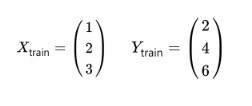

서 1시간, 2시간, 3시간을 공부했을 때 각각 2점, 4점, 6점이 나왔다는 앞서 나온 정보를 이용해야 합니다. 이때 예측을 위해 사용하는 데이터를 훈련 데이터셋(training dataset)이라고 합니다. 학습이 끝난 후, 이 모델이 얼마나 잘 작동하는지 판별하는 데이터셋을 테스트 데이터셋(test dataset)이라고 합니다

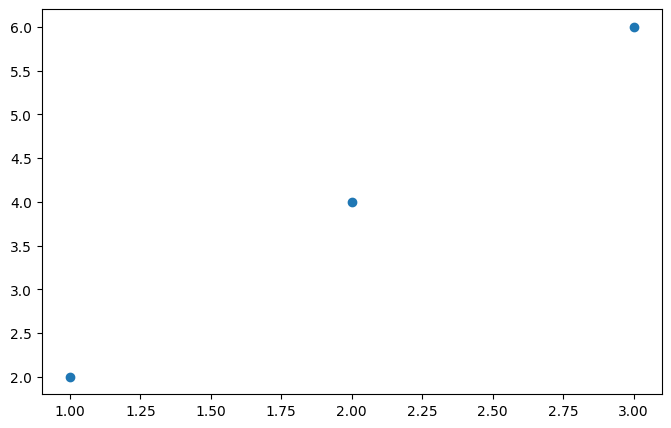

In [57]:
plt.figure(figsize=(8, 5))
plt.scatter(x_train, y_train)
#이 코드는 공부한 시간(x축)에 따른 점수(y축)를 시각적으로 표현하는 것입니다.

In [58]:
# H = Wx + b

model = nn.Linear(1, 1) #하나를 입력하고 하나를 출력
print(model)

Linear(in_features=1, out_features=1, bias=True)


In [59]:
print(list(model.parameters()))
# tensor([[-0.0838]] 기울기 = 가중치
# tensor([-0.0343] bios = 편향

[Parameter containing:
tensor([[-0.0838]], requires_grad=True), Parameter containing:
tensor([-0.0343], requires_grad=True)]


* 가중치(Weight): 가중치는 각 입력 특성에 대한 중요도를 결정합니다. 입력 데이터에 직접 곱해지는 값으로, 가중치가 높을수록 해당 특성이 출력에 미치는 영향이 커집니다. 예를 들어, 선형 회귀 모델에서는 기울기를 가중치로 생각할 수 있습니다.

* 편향(Bias): 편향은 모델의 출력을 특정 방향으로 조정하는 역할을 합니다. 편향은 일종의 보정값으로서, 모든 입력이 0일 때의 출력값을 결정합니다. 선형 회귀에서는 y절편을 편향으로 생각할 수 있습니다.

In [60]:
# 비용 함수
# 비용 함수(cost function) = 손실 함수(loss function)
y_pred = model(x_train)
print(y_pred) #모델에 대한 예측


tensor([[-0.1181],
        [-0.2019],
        [-0.2858]], grad_fn=<AddmmBackward0>)


* x_train이 1일 때, y_pred는 -0.1181
* x_train이 2일 때, y_pred는 -0.2019
* x_train이 3일 때, y_pred는 -0.2858

## **이 값은 y_train 값인 [2, 4, 6] 이 값이 나오는 예측값**

* 손실 함수를 계산하는 과정

 * 예측값과 실제값의 차이를 제곱하여 평균을 낸 것입니다. 이를 수식으로 표현하면 다음과 같습니다.
 * 제곱을 하여 평균을 내는 이유는 예측값과 실제값의 차이가 양수일 수도, 음수일 수도 있기 때문에, 제곱을 통해 항상 양수값을 얻어내어 차이의 크기를 비교하기 위함입니다.


In [61]:
((y_pred - y_train) ** 2).mean() #tensor(20.5513 MSE값

tensor(20.5513, grad_fn=<MeanBackward0>)

In [62]:
loss = nn.MSELoss()(y_pred, y_train)
loss
#예측값(y_pred)과 실제값(y_train) 사이의 오차를 계산

tensor(20.5513, grad_fn=<MseLossBackward0>)

* MSE는 예측값과 실제값 사이의 차이를 제곱한 후, 그 값들의 평균을 구하는 방법입니다. 일반적으로 회귀(Regression) 문제에서 사용되며, 예측값과 실제값의 차이를 제곱하여 제곱 오차를 계산하고 이를 평균내는 방식입니다.
* MSE는 평균 제곱 오차(Mean Squared Error)를 나타냅니다.
n은 데이터 샘플의 개수를 의미합니다.
y_pred는 신경망 모델의 예측값입니다.
y_train은 실제값(타겟값)입니다.
MSE 손실 함수의 결과 값은 예측값과 실제값 사이의 차이를 나타내며, 이 값을 최소화
* 중치와 편향을 조정하여 MSE 손실을 최소화하도록 학습합니다.

In [63]:
# 데이터 ([[1],[2],[3]])
# W: []

### 경사 하강법(Gradient Descent)
* 비용 함수의 값을 최소로 하는 W와 B를 찾는 알고리즘을 옵티마이저 알고리즘이라고 함
* 최적화 알고리즘
* 옵티마이저 알고리즘을 통해 W와 b를 찾아내는 과정을 합습이라고 부름
* 경사 하강법은 가장 기본적인 오비마이저 알고리즘

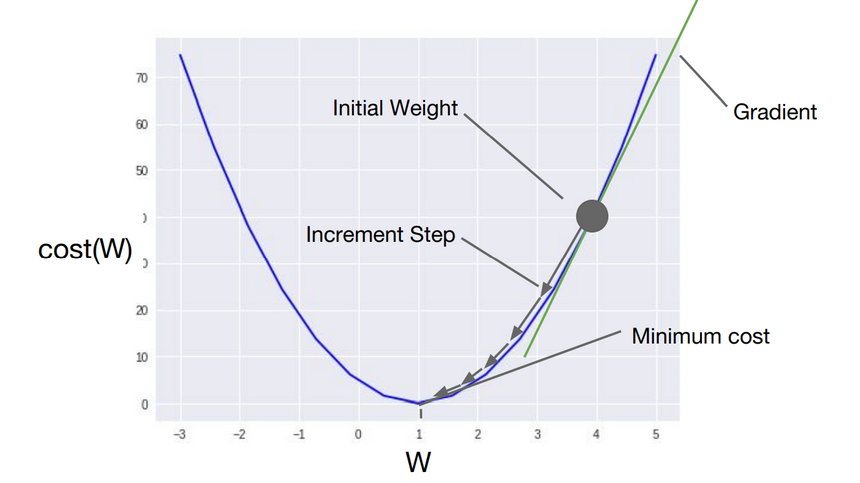

In [64]:
# 학습률(Learning rate): 한 번 움직이는 거리(increment step)
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [65]:
loss = nn.MSELoss()(y_pred, y_train)
#손실 함수값을 loss에 저장

# gradient를 초기화
optimizer.zero_grad()
loss.backward() # 미분값을 이용해서 기울기(가중치)와 절편을 찾아낸다 -> 비용함수를 미분해서 gradient(기울기) 계산
optimizer.step() # W와 b를 업데이트  gradient를 바탕으로 모델의 가중치와 편향을 업데이트합니다.

print(list(model.parameters()))
# w: [[-0.0838] b: [-0.0343]
# w: [[0.1120]] b: [0.0498]

[Parameter containing:
tensor([[0.1120]], requires_grad=True), Parameter containing:
tensor([0.0498], requires_grad=True)]


In [66]:
# 학습(Training)
# 반복 훈련을 하면서 틀린 W, b를 수정하여 오차를 게속 줄여나감
# epochs: 반복 훈련 횟수
epochs = 1000

for epoch in range(epochs + 1):
    y_pred = model(x_train)
    loss = nn.MSELoss()(y_pred, y_train) #모델의 예측값과 실제값 사이의 평균 제곱 오차(MSE)를 계산하여 손실 함수의 값을 계산합니다.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'Epoch {epoch}/{epoch} Loss: {loss:.6f}')
        #점점 좋은 기울기를 찾고 있다 가중치가 가장 적은 최적의 모델을 찾는 과정
        # 손실 함수 값을 찾는다
        # 각 에포크에서 손실 함수를 최소화하는 방향으로 모델의 가중치를 업데이트하고, 100 에포크마다 학습 상태를 출력하는 과정을 나타냅니다.

Epoch 0/0 Loss: 16.260735
Epoch 100/100 Loss: 0.048222
Epoch 200/200 Loss: 0.029798
Epoch 300/300 Loss: 0.018414
Epoch 400/400 Loss: 0.011378
Epoch 500/500 Loss: 0.007031
Epoch 600/600 Loss: 0.004345
Epoch 700/700 Loss: 0.002685
Epoch 800/800 Loss: 0.001659
Epoch 900/900 Loss: 0.001025
Epoch 1000/1000 Loss: 0.000634


In [67]:
print(list(model.parameters()))
#  1.9708 * x + 0.0663
# Wx + b -> W는 가중치 b는 오차율


[Parameter containing:
tensor([[1.9708]], requires_grad=True), Parameter containing:
tensor([0.0663], requires_grad=True)]


In [68]:
x_test = torch.FloatTensor([[10], [12.12345]])
y_pred = model(x_test)
print(y_pred)

tensor([[19.7747],
        [23.9596]], grad_fn=<AddmmBackward0>)


* 입력값이 10일 때 모델의 예측값은 약 19.7747이고, 입력값이 12.12345일 때의 예측값은 약 23.9596이라는 것입니다.

# 2. 다중 선형 회귀
* 여러 개의 입력이 들어가서 한 개의 출력이 나오는 구조


In [69]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70],])

y_train = torch.FloatTensor([[152],[185],[180],[196],[142]])


print(x_train)
print(x_train.shape)
print(y_train)
print(y_train.shape)

tensor([[ 73.,  80.,  75.],
        [ 93.,  88.,  93.],
        [ 89.,  91.,  90.],
        [ 96.,  98., 100.],
        [ 73.,  66.,  70.]])
torch.Size([5, 3])
tensor([[152.],
        [185.],
        [180.],
        [196.],
        [142.]])
torch.Size([5, 1])


In [70]:
# H = W1x1 + W2x2 + W3x3 + b
model = nn.Linear(3,1) #3개를 입력하면 1개가 나온다
print(model)

Linear(in_features=3, out_features=1, bias=True)


In [71]:
print(list(model.parameters()))
# [[-0.2165,  0.1328, -0.3303]] 3개의 가중치
#[-0.1018 오차율
# 최적화 하기전에 값들

[Parameter containing:
tensor([[-0.2165,  0.1328, -0.3303]], requires_grad=True), Parameter containing:
tensor([-0.1018], requires_grad=True)]


In [72]:
optimizer = optim.SGD(model.parameters(), lr=0.00001)

In [73]:
epochs = 1000

for epoch in range(epochs + 1):
    y_pred = model(x_train)
    loss = nn.MSELoss()(y_pred, y_train) #모델의 예측값과 실제값 사이의 평균 제곱 오차(MSE)를 계산하여 손실 함수의 값을 계산합니다.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'Epoch {epoch}/{epoch} Loss: {loss:.6f}')

Epoch 0/0 Loss: 43266.148438
Epoch 100/100 Loss: 4.803024
Epoch 200/200 Loss: 4.560738
Epoch 300/300 Loss: 4.331190
Epoch 400/400 Loss: 4.113773
Epoch 500/500 Loss: 3.907800
Epoch 600/600 Loss: 3.712666
Epoch 700/700 Loss: 3.527837
Epoch 800/800 Loss: 3.352756
Epoch 900/900 Loss: 3.186870
Epoch 1000/1000 Loss: 3.029752


In [74]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.6800, 0.8300, 0.5040]], requires_grad=True), Parameter containing:
tensor([-0.0911], requires_grad=True)]


In [75]:
x_test = torch.FloatTensor([[82,92,82]])
y_pred = model(x_test)
print(y_pred)

tensor([[173.3595]], grad_fn=<AddmmBackward0>)


점수가 82,92,82일 때 모델의 예측값은 약 173.3595

# 문제
temp.csv 데이터에서 기온에 다른 지면 온도를 예측해보자

In [76]:
import pandas as pd

temp_df = pd.read_csv('/content/drive/MyDrive/파이썬 KDT 시즌1/8. 머신러닝과 딥러닝/데이터셋/temps.csv', encoding='cp949')

In [77]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8782 entries, 0 to 8781
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   지점        8782 non-null   int64  
 1   지점명       8782 non-null   object 
 2   일시        8782 non-null   object 
 3   기온(°C)    8779 non-null   float64
 4   지면온도(°C)  8782 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 343.2+ KB


In [78]:
temp_df = temp_df.dropna()

In [79]:
x_train = torch.FloatTensor(temp_df[['기온(°C)']].values)
y_train = torch.FloatTensor(temp_df[['지면온도(°C)']].values)

print(x_train)
print(x_train.shape)
print(y_train)
print(y_train.shape)

tensor([[-8.7000],
        [-7.3000],
        [-6.7000],
        ...,
        [-7.3000],
        [-9.0000],
        [-9.2000]])
torch.Size([8779, 1])
tensor([[-2.9000],
        [-2.4000],
        [-2.2000],
        ...,
        [-1.2000],
        [-1.5000],
        [-1.2000]])
torch.Size([8779, 1])


In [80]:
model = nn.Linear(1, 1) #하나를 입력하고 하나를 출력
print(model)

Linear(in_features=1, out_features=1, bias=True)


In [81]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.3876]], requires_grad=True), Parameter containing:
tensor([0.9386], requires_grad=True)]


In [82]:
y_pred = model(x_train)
print(y_pred)

tensor([[-2.4334],
        [-1.8908],
        [-1.6582],
        ...,
        [-1.8908],
        [-2.5497],
        [-2.6272]], grad_fn=<AddmmBackward0>)


In [83]:
x_test = torch.FloatTensor([1.0])
y_pred = model(x_test)
print(y_pred)

tensor([1.3262], grad_fn=<AddBackward0>)


In [84]:
epochs = 1000

for epoch in range(epochs + 1):
    y_pred = model(x_train)
    loss = nn.MSELoss()(y_pred, y_train) #모델의 예측값과 실제값 사이의 평균 제곱 오차(MSE)를 계산하여 손실 함수의 값을 계산합니다.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'Epoch {epoch}/{epoch} Loss: {loss:.6f}')

Epoch 0/0 Loss: 133.640076
Epoch 100/100 Loss: 133.640076
Epoch 200/200 Loss: 133.640076
Epoch 300/300 Loss: 133.640076
Epoch 400/400 Loss: 133.640076
Epoch 500/500 Loss: 133.640076
Epoch 600/600 Loss: 133.640076
Epoch 700/700 Loss: 133.640076
Epoch 800/800 Loss: 133.640076
Epoch 900/900 Loss: 133.640076
Epoch 1000/1000 Loss: 133.640076


In [85]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.3876]], requires_grad=True), Parameter containing:
tensor([0.9386], requires_grad=True)]


In [87]:
x_test = torch.FloatTensor([1.0])
y_pred = model(x_test)
print(y_pred)

tensor([1.3262], grad_fn=<AddBackward0>)


------------------------------------------------------------------------------

# 문제
temp.csv 데이터에서 기온에 다른 지면 온도를 예측해보자

In [89]:
import pandas as pd

temp_df = pd.read_csv('/content/drive/MyDrive/파이썬 KDT 시즌1/8. 머신러닝과 딥러닝/데이터셋/temps.csv', encoding='cp949')
temp_df

,지점,지점명,일시,기온(°C),지면온도(°C)
0,232,천안,2020-01-01 01:00,-8.7,-2.9
1,232,천안,2020-01-01 02:00,-7.3,-2.4
2,232,천안,2020-01-01 03:00,-6.7,-2.2
3,232,천안,2020-01-01 04:00,-6.2,-2.0
4,232,천안,2020-01-01 05:00,-5.9,-1.9
...,...,...,...,...,...
8777,232,천안,2020-12-31 19:00,-6.6,-0.6
8778,232,천안,2020-12-31 20:00,-6.4,-0.7
8779,232,천안,2020-12-31 21:00,-7.3,-1.2
8780,232,천안,2020-12-31 22:00,-9.0,-1.5


In [91]:
temp_df.isnull().sum()

지점          0
지점명         0
일시          0
기온(°C)      3
지면온도(°C)    0
dtype: int64

In [93]:
temp_df = temp_df.dropna()
temp_df.isnull().sum()

지점          0
지점명         0
일시          0
기온(°C)      0
지면온도(°C)    0
dtype: int64

In [97]:
x_data = temp_df[['기온(°C)']]
y_data = temp_df[['지면온도(°C)']]

x_data = torch.FloatTensor(x_data.values)
y_data = torch.FloatTensor(y_data.values)

print(x_data.shape)
print(y_data.shape)

torch.Size([8779, 1])
torch.Size([8779, 1])


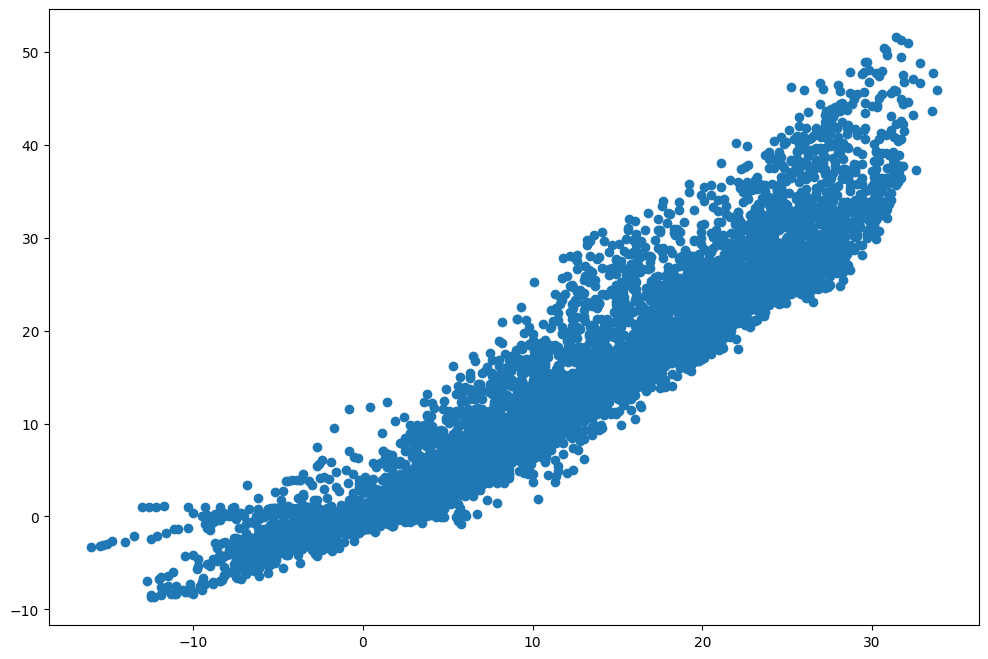

In [99]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.scatter(x_data, y_data)

In [101]:
model = nn.Linear(1, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.2356]], requires_grad=True), Parameter containing:
tensor([-0.3393], requires_grad=True)]


In [105]:
epochs = 1000

for epoch in range(epochs + 1):
    y_pred = model(x_data)
    loss = nn.MSELoss()(y_pred, y_data) #모델의 예측값과 실제값 사이의 평균 제곱 오차(MSE)를 계산하여 손실 함수의 값을 계산합니다.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'Epoch {epoch}/{epoch} Loss: {loss:.6f}')

Epoch 0/0 Loss: 12.960246
Epoch 100/100 Loss: 12.959666
Epoch 200/200 Loss: 12.959174
Epoch 300/300 Loss: 12.958755
Epoch 400/400 Loss: 12.958400
Epoch 500/500 Loss: 12.958097
Epoch 600/600 Loss: 12.957839
Epoch 700/700 Loss: 12.957621
Epoch 800/800 Loss: 12.957434
Epoch 900/900 Loss: 12.957276
Epoch 1000/1000 Loss: 12.957143


In [106]:
print(list(model.parameters()))

[Parameter containing:
tensor([[1.0875]], requires_grad=True), Parameter containing:
tensor([0.7767], requires_grad=True)]


In [108]:
y_pred = model(x_data).detach().numpy() #ndarray로 변형후 numpy로 저장
y_pred

array([[-8.684461 ],
       [-7.1619825],
       [-6.5094914],
       ...,
       [-7.1619825],
       [-9.010707 ],
       [-9.228204 ]], dtype=float32)

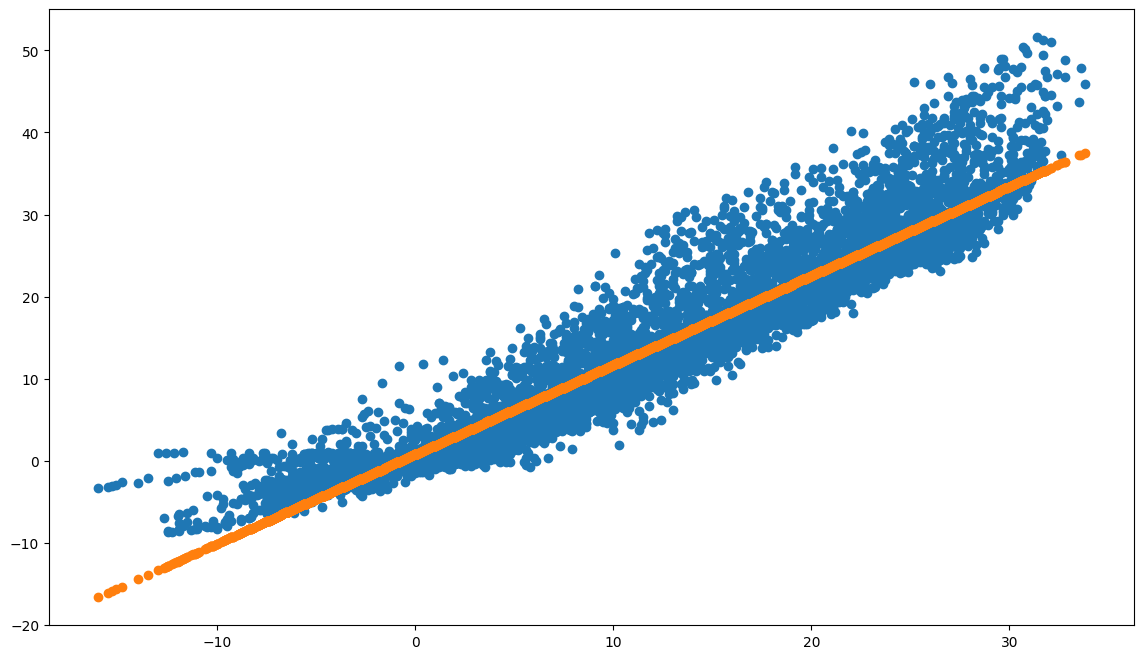

In [109]:
plt.figure(figsize=(14, 8))
plt.scatter(x_data, y_data)
plt.scatter(x_data, y_pred )
#

In [110]:
x_test = torch.FloatTensor([1.0])
y_pred = model(x_test)
print(y_pred)

tensor([1.8641], grad_fn=<AddBackward0>)
